In [1]:
# Add gradient clipping
# Add strange noise
# reduced the learning rates
# Weights init



In [2]:
%cd ..

C:\Users\Ivan Valles Perez\Documents\WorkingDirectory\Reacher


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from unityagents import UnityEnvironment

from src.agents import *
from src.rl_utilities import *

In [4]:
env_path = "./envs/Reacher_Windows_x86_64/Reacher.exe"
env = UnityEnvironment(env_path)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)

action_size = brain.vector_action_space_size

state = env_info.vector_observations
state_size = state.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
batch_size = 128
n_episodes = int(1e5)
n_batches_train = 1
exp_replay_buffer_size = int(2e5)
epsilon_decay = 0.99999
epsilon = 1
epsilon_final = 0.1
scores = []
agent = DDPGAgent(CriticArchitecture, ActorArchitecture, state_size=state_size, action_size=action_size, 
                  tau=0.001, epsilon=0.01, gamma=0.99, batch_size=batch_size, replay_size = exp_replay_buffer_size,
                  n_batches_train=n_batches_train, random_seed=655321)


In [161]:
for episode in range(n_episodes):
    #epsilon = epsilon_decay * epsilon + (1-epsilon_decay) * epsilon_final
    env_info = env.reset(train_mode=True)[brain_name] 
    agent.reset()
    state = env_info.vector_observations
    score = 0
    done = False
    c = 0
    while not done:
        # take random action
        action = agent.act(state, add_noise=True)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        c += 1

    scores.append(score)
    clear_output(True)
    if (episode+1) % 10 == 0:
        plot_smoothed_return(scores)


KeyboardInterrupt: 

In [11]:
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations
done = False
c=0
agent.reset()
score=0
while not done:
    # take random action
    action = agent.act(state, add_noise=False)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score +=reward
    c += 1
    state = next_state

C:\Users\Ivan Valles Perez\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [12]:
score

36.75999917834997

In [ ]:
s,a,r,ns,d = agent.replay_buffer.draw_sample(128)

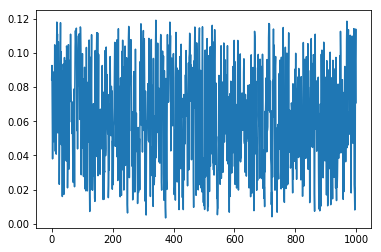

In [124]:
noise = OUNoise(1, 0, mu=0, theta=0.8, sigma=0.1)



noise.reset()

x = [noise.sample() for _ in range(1000)]

plt.plot(x)

In [117]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [156]:
def ewma(x, span=100):
    return pd.Series(x).ewm(span=span).mean()


def ewmsd(x, span=100):
    return pd.Series(x).ewm(span=span).std()

In [157]:
def plot_smoothed_return(scores, span=100):
    means = ewma(scores, span)
    stds = ewmsd(scores, span)
    
    plt.figure(figsize=(15, 6))
    plt.grid()
    
    plt.scatter(range(len(scores)), scores, alpha=1, s=1, color="grey")
    
    plt.fill_between(range(len(means)), means+stds, means-stds,
                     color='#1f77b4', alpha=.3)
    
    plt.plot(means, color='#1f77b4')
    
    plt.xlabel("# of episodes")
    plt.ylabel("Cummulative reward")
    plt.legend(["Average return", "Individual returns", "Standard deviation"])
    plt.show()

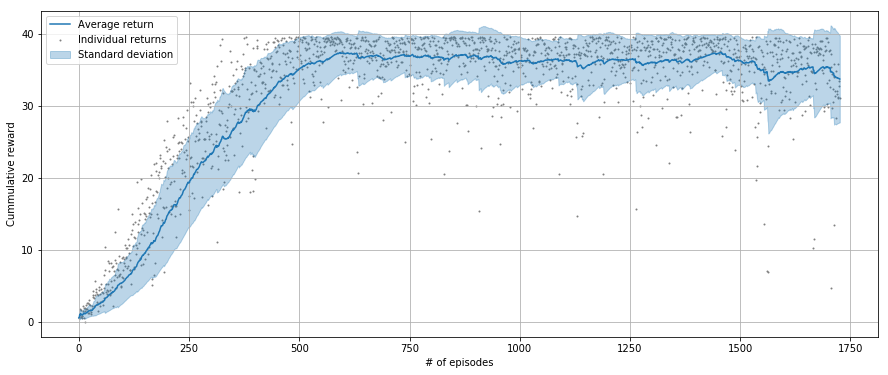

100000.0000004551

In [ ]:
epsilon = 